In [159]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install scipy
%pip install shap



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.9 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.7 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 1.8 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.8 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [163]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
import shap

In [11]:
df=pd.read_csv('Dataset.csv')
df_copy=df.copy()
df_copy.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


LEVEL-1

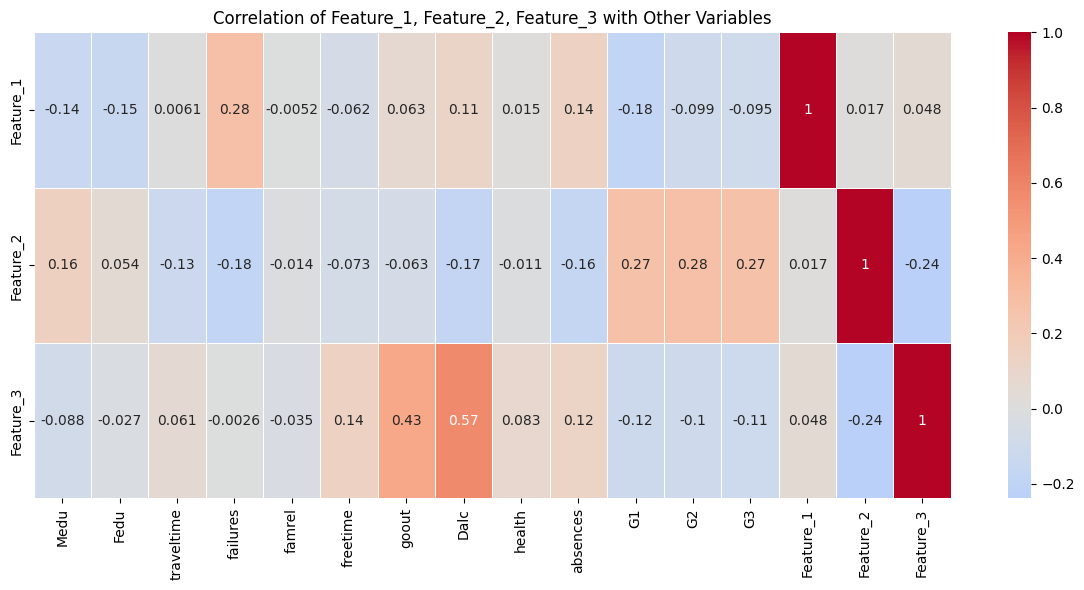

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix.loc[['Feature_1', 'Feature_2', 'Feature_3'], df_numeric.columns],
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation of Feature_1, Feature_2, Feature_3 with Other Variables')
plt.tight_layout()
plt.show()

Feature_1 has positive correlation with failures.
Feature_2 has good correlation with those who drink alcohols, negative correlation with family relationship .
Feature_2 has negative correlation with health.

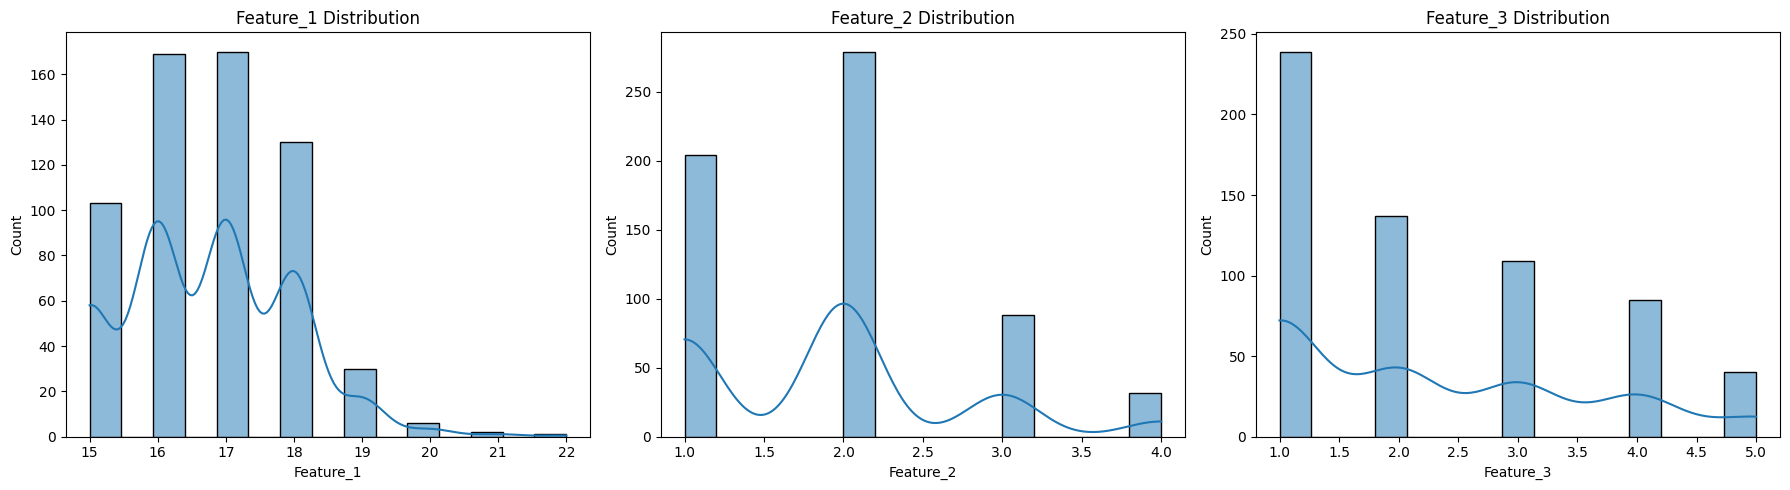

In [34]:
cols=['Medu', 'Fedu', 'goout', 'Dalc', 'health', 
             'absences', 'G1', 'G2', 'G3', 'internet',
             'romantic', 'famrel', 'Feature_1', 'Feature_2', 'Feature_3']
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Feature_1'], bins=15, kde=True,ax=ax[0])
ax[0].set_title('Feature_1 Distribution')
sns.histplot(df['Feature_2'], bins=15,kde=True, ax=ax[1])
ax[1].set_title('Feature_2 Distribution')
sns.histplot(x=df['Feature_3'],bins=15,kde=True,ax=ax[2])
ax[2].set_title('Feature_3 Distribution')
plt.tight_layout()
plt.show()

Feature_1 shows discrete values (>15), it can be any numerical feature.
Feature_2 shows value limited between 1 to 4. It can be a scale or any feature whose value is in 1-4 range. However, seeing the dataset of enquiring students no such continous feature possibilty exists which will be restricted in 1-4 for all the data. Therefore, it should be a scale only.
Feature_3 shows value limited between 1 to 5. It can be a scale or any feature whose value is in 1-4 range.But for same reason as given for Feature_2 it should also be a scale.

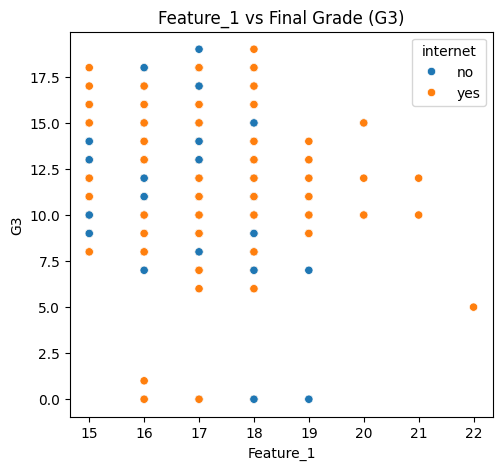

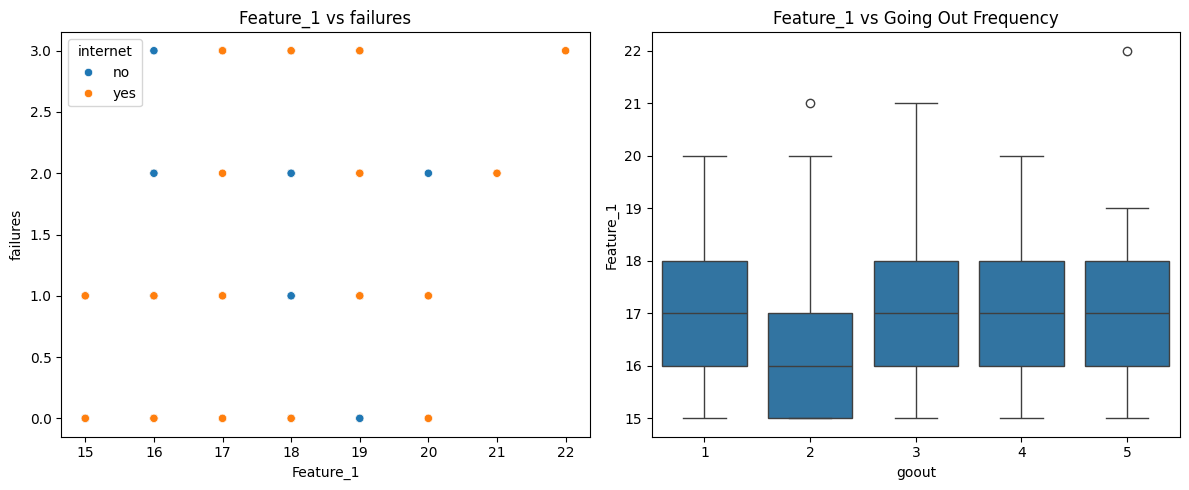

In [29]:
#Now, comparing each feature with most crucial datas in dataset (according to me)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Feature_1'], y=df['G3'], hue=df['internet'])
plt.title('Feature_1 vs Final Grade (G3)')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Feature_1'], y=df['failures'],hue=df['internet'])
plt.title('Feature_1 vs failures')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['goout'], y=df['Feature_1'])
plt.title('Feature_1 vs Going Out Frequency')
plt.tight_layout()
plt.show()

Feature_1 graphs for final score shows that after a certain value of Feature_1, grades are less.

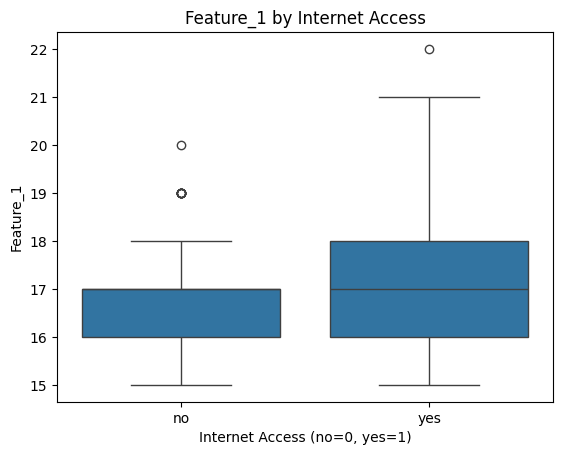

In [181]:
sns.boxplot(x='internet', y='Feature_1', data=df)
plt.xlabel('Internet Access (no=0, yes=1)')
plt.ylabel('Feature_1')
plt.title('Feature_1 by Internet Access')
plt.show()
plt.show()

Higher feature_1 has more likely to have internet access

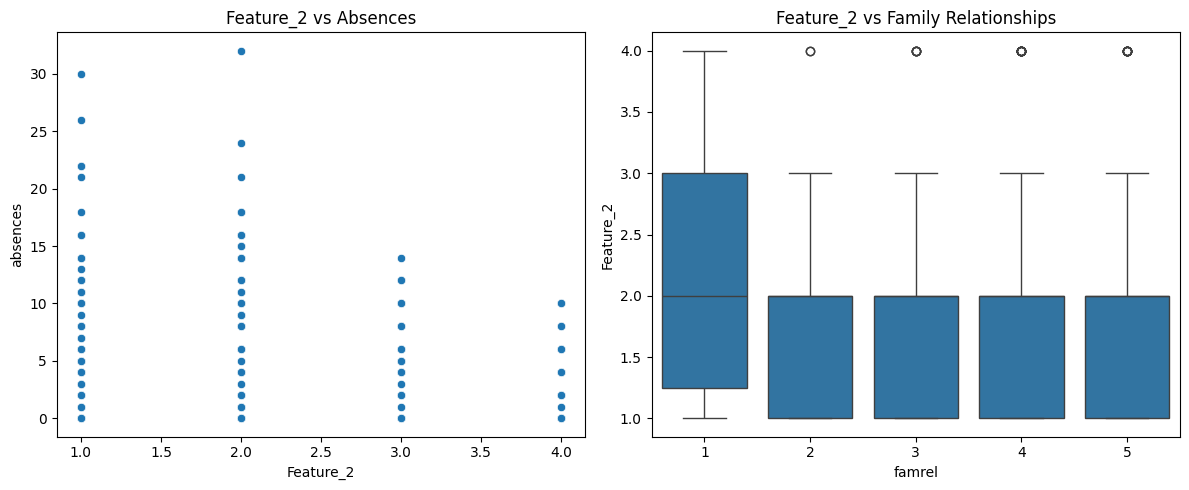

In [42]:
#Feature 2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Feature_2'], y=df['absences'])
plt.title('Feature_2 vs Absences')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['famrel'], y=df['Feature_2'])
plt.title('Feature_2 vs Family Relationships')
plt.tight_layout()
plt.show()

Better family relationship has lesser scale of Feature_2
Higher Feature_2 tends to have higher grades.
Higher feature_2 tends to have less number of absences

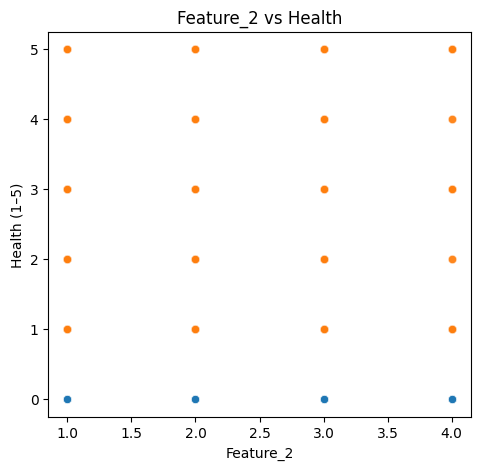

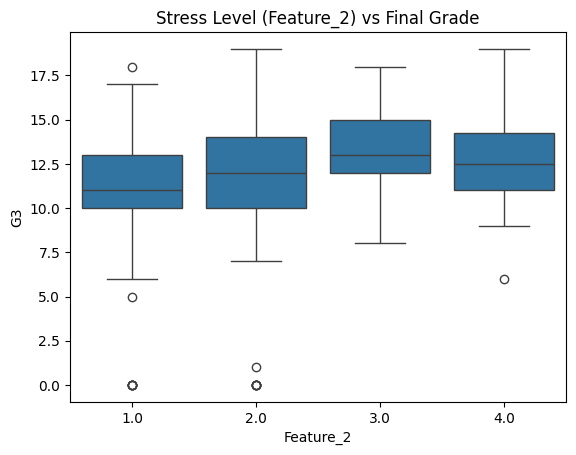

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Feature_2'], y=df['failures'])
plt.title('Feature_2 vs number of failures')
sns.scatterplot(x='Feature_2', y='health', data=df, alpha=0.6)
plt.xlabel('Feature_2')
plt.ylabel('Health (1–5)')
plt.title('Feature_2 vs Health')
plt.show()
sns.boxplot(x='Feature_2', y='G3', data=df)
plt.xlabel('Feature_2')
plt.ylabel('G3')
plt.title('Stress Level (Feature_2) vs Final Grade')
plt.show()

As feature_2 increases upto certain limit grades increases after that it decreases.

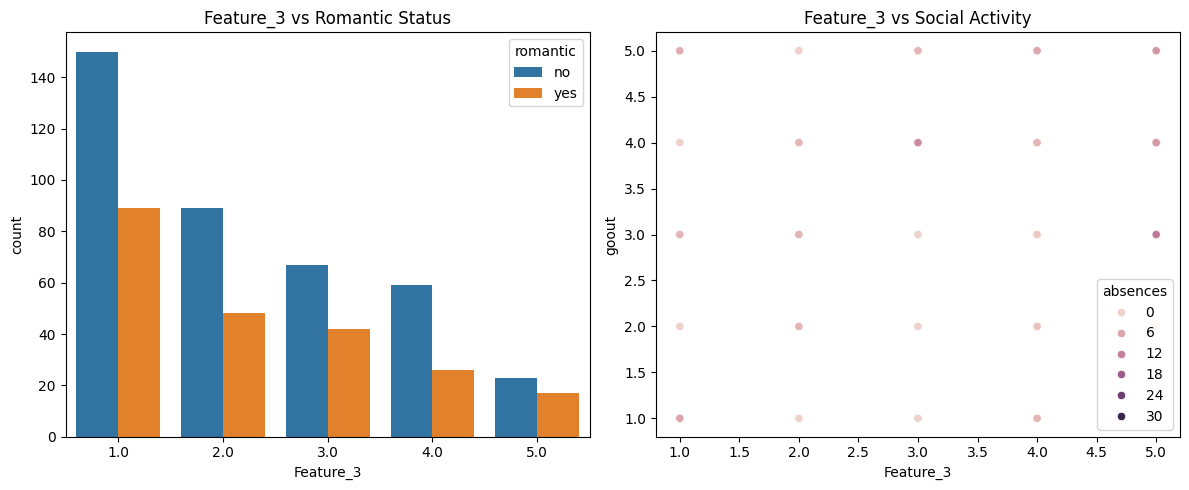

In [32]:
#Feature 3
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Feature_3'], hue=df['romantic'])
plt.title('Feature_3 vs Romantic Status')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Feature_3'], y=df['goout'], hue=df['absences'])
plt.title('Feature_3 vs Social Activity')
plt.tight_layout()
plt.show()


For a particular scale of feature_3 ratio of number of people in romantic upon non romantic decreases hinting people with higher feature_3 tends to have nearly same population of those who are in relationship or not.
students with higher Feature_3 are more prone to goout.

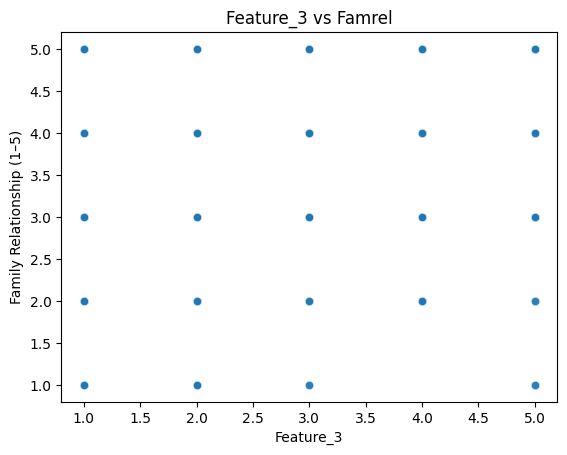

In [50]:
sns.scatterplot(x='Feature_3', y='famrel', data=df, alpha=0.6)
plt.xlabel('Feature_3')
plt.ylabel('Family Relationship (1–5)')
plt.title('Feature_3 vs Famrel')
plt.show()

Final conclusion: 
Feature-1 : Weekly screen-time
Feature-2 : Stress levels
Feature-3 : Social activity level

LEVEL-2

In [52]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [60]:
imputed=df.copy()
if 'famsize' in imputed.columns and 'Pstatus' in imputed.columns:
    mask_missing = imputed['famsize'].isna()
    imputed.loc[mask_missing, 'famsize'] = np.where(
        imputed.loc[mask_missing, 'Pstatus'] == 'A',
        'LE3', 
        'GT3'
    )

In [91]:
mode_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
median_imputer = SimpleImputer(strategy='median',missing_values=np.nan)

mode_cols = ['Fedu', 'traveltime', 'higher', 'freetime', 'Feature_2', 'Feature_3']
imputed[mode_cols] = mode_imputer.fit_transform(imputed[mode_cols])
imputed[['Feature_1']] = median_imputer.fit_transform(imputed[['Feature_1']])
imputed.isnull().sum()

school          0
sex             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
famrel          0
freetime        0
goout           0
Dalc            0
health          0
absences       69
G1              0
G2             35
G3              0
Feature_1       0
Feature_2       0
Feature_3       0
romantic      649
dtype: int64

LEVEL-3

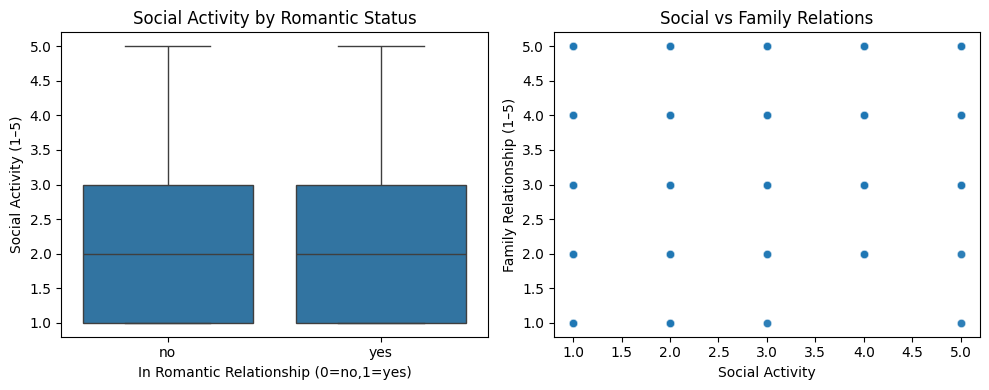

In [62]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x='romantic', y='Feature_3', data=imputed)
plt.xlabel('In Romantic Relationship (0=no,1=yes)')
plt.ylabel('Social Activity (1–5)')
plt.title('Social Activity by Romantic Status')

plt.subplot(1,2,2)
sns.scatterplot(x='Feature_3', y='famrel', data=imputed, alpha=0.6)
plt.xlabel('Social Activity')
plt.ylabel('Family Relationship (1–5)')
plt.title('Social vs Family Relations')

plt.tight_layout()
plt.show()


Does social activity differ by romantic status and family relationships?

Pretty balanced , Social activity isn't changing after being in Romantic relationship.Dataset might be considering activities of couples as social activity (As it is exactly same).

Family relationship is also not a hindrance for social activity.

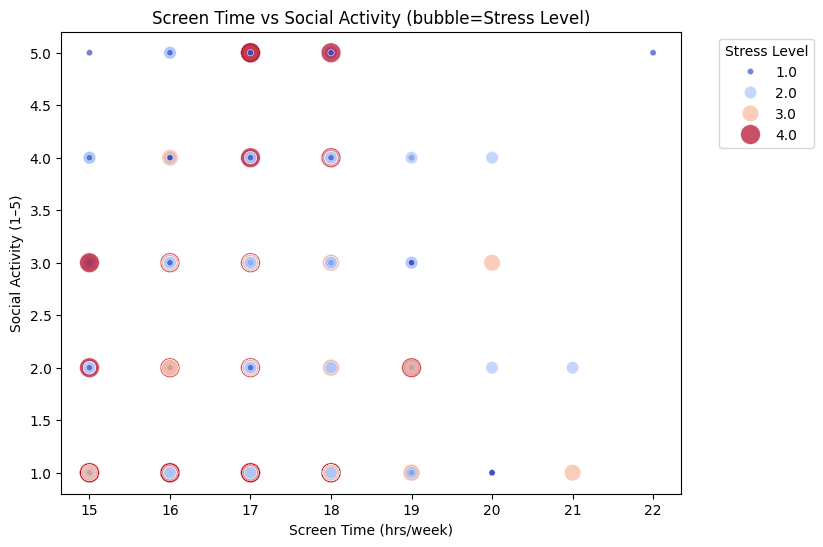

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Feature_1', y='Feature_3',
    size='Feature_2', sizes=(20,200),
    hue='Feature_2', palette='coolwarm',
    data=imputed, alpha=0.7
)
plt.xlabel('Screen Time (hrs/week)')
plt.ylabel('Social Activity (1–5)')
plt.title('Screen Time vs Social Activity (bubble=Stress Level)')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

What’s the interconnection between screen time, social activity, and stress?

Generally, Students with higher level of social activity tends to have lower stress level.
Students with higher screen time tends to have lesser scale of social activity. No such guarantee of stress levels assured by screen time.

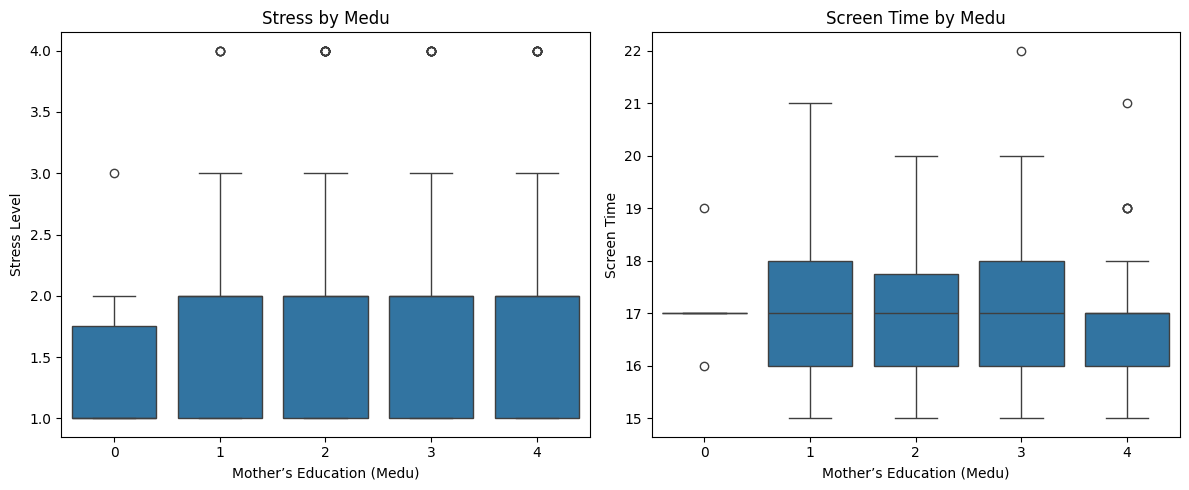

In [67]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Medu', y='Feature_2', data=imputed)
plt.xlabel('Mother’s Education (Medu)')
plt.ylabel('Stress Level')
plt.title('Stress by Medu')

plt.subplot(1,2,2)
sns.boxplot(x='Medu', y='Feature_1', data=imputed)
plt.xlabel('Mother’s Education (Medu)')
plt.ylabel('Screen Time')
plt.title('Screen Time by Medu')

plt.tight_layout()
plt.show()


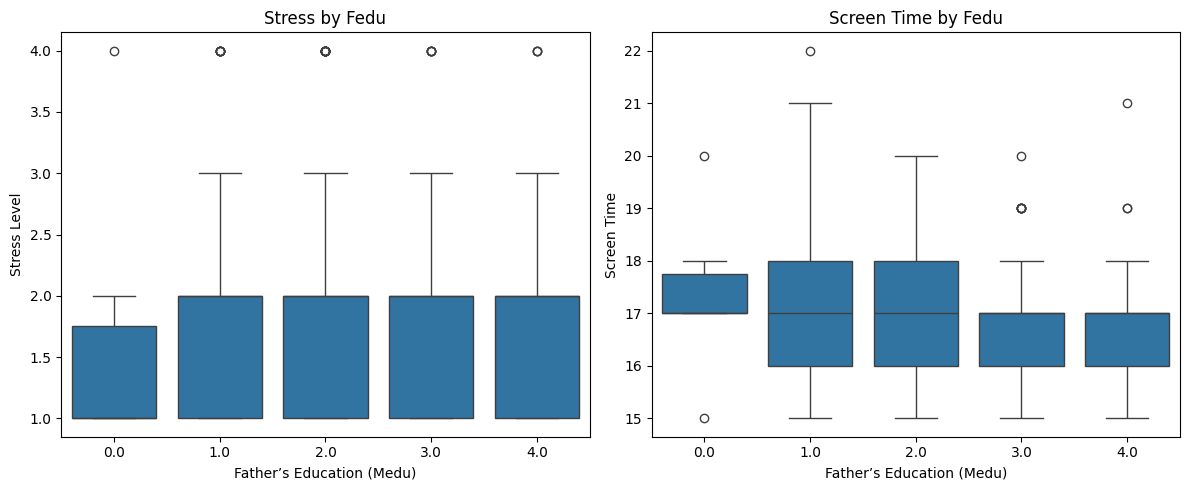

In [183]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Fedu', y='Feature_2', data=imputed)
plt.xlabel('Father’s Education (Medu)')
plt.ylabel('Stress Level')
plt.title('Stress by Fedu')

plt.subplot(1,2,2)
sns.boxplot(x='Fedu', y='Feature_1', data=imputed)
plt.xlabel('Father’s Education (Medu)')
plt.ylabel('Screen Time')
plt.title('Screen Time by Fedu')

plt.tight_layout()
plt.show()

Do students with low parental education report higher stress and screen time?

No such trends of stress level found from it.Infact, they all showed similar stress levels from(1-4). However, with very high education level of father or mother or both screen time is the least(generally). While, greater for lowest education level of parents(either or both).

Why it matters: If lower‑educated parents’ kids are more stressed or glued to screens, targeted academic or counseling support programs could be prioritized.

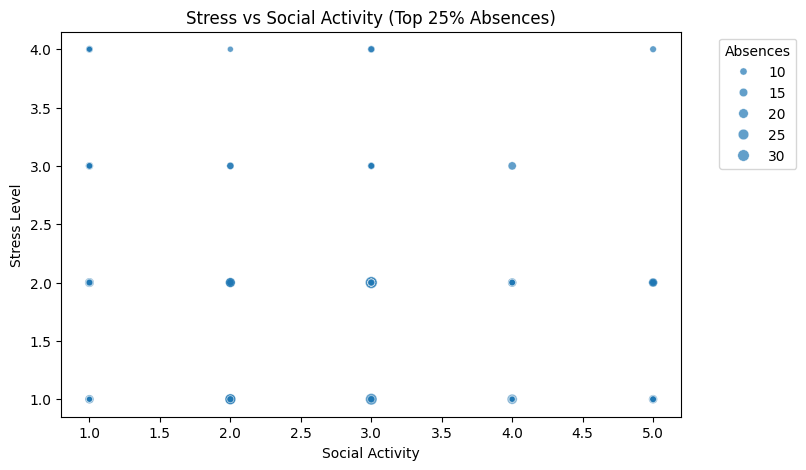

In [68]:
high_abs = df[df['absences'] >= df['absences'].quantile(0.75)]
plt.figure(figsize=(8,5))
sns.scatterplot(x='Feature_3', y='Feature_2', size='absences', data=high_abs, alpha=0.7)
plt.xlabel('Social Activity')
plt.ylabel('Stress Level')
plt.title('Stress vs Social Activity (Top 25% Absences)')
plt.legend(title='Absences', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


 Among students with high absence rates, how does social activity vs stress trade off?

High absences have lesser(or moderate) social activity as well.
Why it matters : To know where are they investing their time and their mental status

C:\Users\My\AppData\Local\Temp\ipykernel_33520\700249484.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='traveltime', y='absences', data=imputed, ci=None)
C:\Users\My\AppData\Local\Temp\ipykernel_33520\700249484.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='traveltime', y='G3', data=imputed, ci=None)


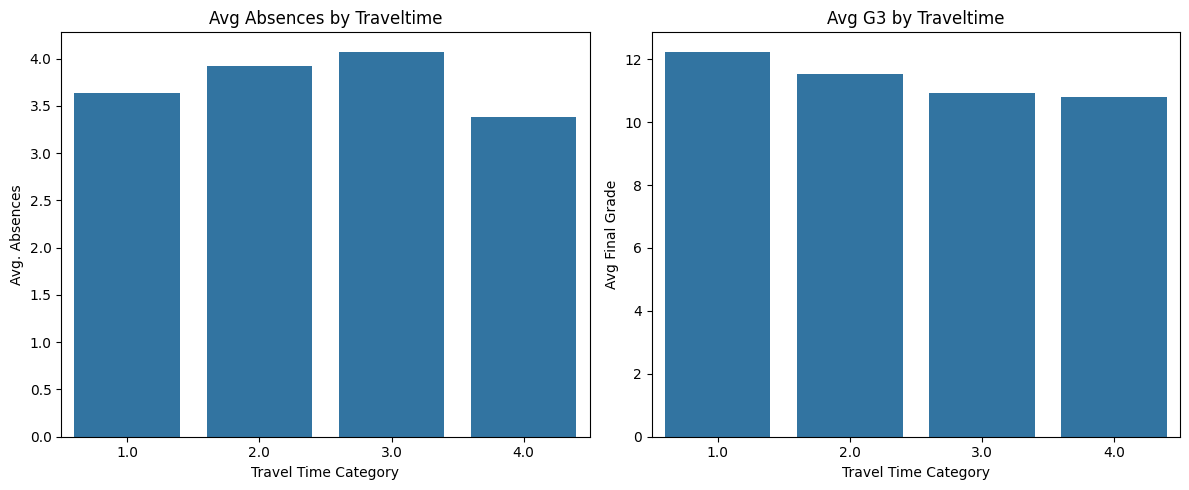

In [70]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='traveltime', y='absences', data=imputed, ci=None)
plt.xlabel('Travel Time Category')
plt.ylabel('Avg. Absences')
plt.title('Avg Absences by Traveltime')

plt.subplot(1,2,2)
sns.barplot(x='traveltime', y='G3', data=imputed, ci=None)
plt.xlabel('Travel Time Category')
plt.ylabel('Avg Final Grade')
plt.title('Avg G3 by Traveltime')

plt.tight_layout()
plt.show()


Does travel time to school (traveltime) affect absences and final grades?

It turns out that students with lesser travel time are scoring bettter than those with higher time travel.
On an average, students who fall in higher time travel category are not more absences suggesting time travel category is not the best factor for reason of their absences.
Why it matters: Long commutes can erode attendance and performance,campus transport initiatives could help.

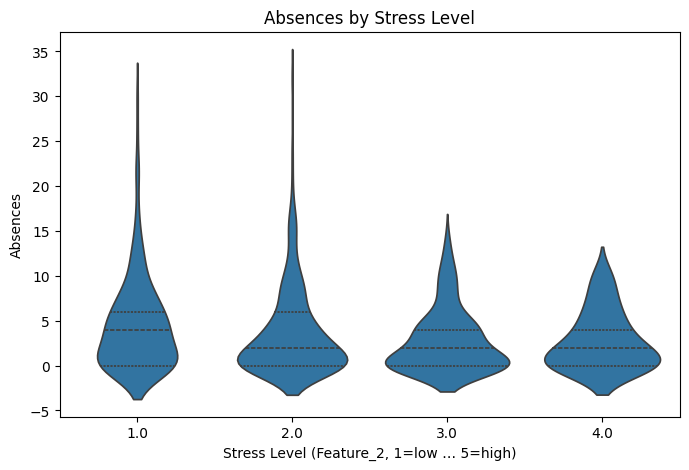

In [72]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Feature_2', y='absences', data=df, inner='quartile')
plt.xlabel('Stress Level (Feature_2, 1=low … 5=high)')
plt.ylabel('Absences')
plt.title('Absences by Stress Level')
plt.show()



How do stress levels relate to absences of student?

Higher stress generally corresponds to more absences—the median moves upward from stress 1 to stress 4.the widest spread occurs at moderate stress (level 2). That suggests a subgroup of moderately stressed students who are driving up absenteeism, while the very highest‑stress group is more uniformly absent at moderate levels.

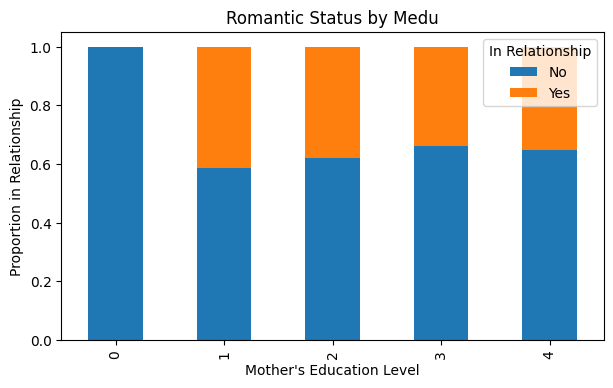

In [73]:
pd.crosstab(df['Medu'], df['romantic'], normalize='index')\
   .plot(kind='bar', stacked=True, figsize=(7,4))
plt.xlabel("Mother's Education Level")
plt.ylabel("Proportion in Relationship")
plt.title("Romantic Status by Medu")
plt.legend(['No','Yes'], title='In Relationship')
plt.show()


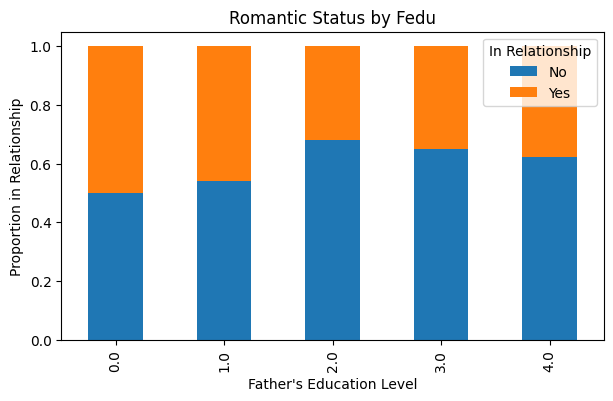

In [180]:
pd.crosstab(df['Fedu'], df['romantic'], normalize='index')\
   .plot(kind='bar', stacked=True, figsize=(7,4))
plt.xlabel("Father's Education Level")
plt.ylabel("Proportion in Relationship")
plt.title("Romantic Status by Fedu")
plt.legend(['No','Yes'], title='In Relationship')
plt.show()

Does kids of parents with higher education more prone to relationship(romantic)?

No that's not exactly the case however, students with Medu at 0 level are not at all in romantic relationship.Students with lower Fedu are at higher proportion in romantic relationship.

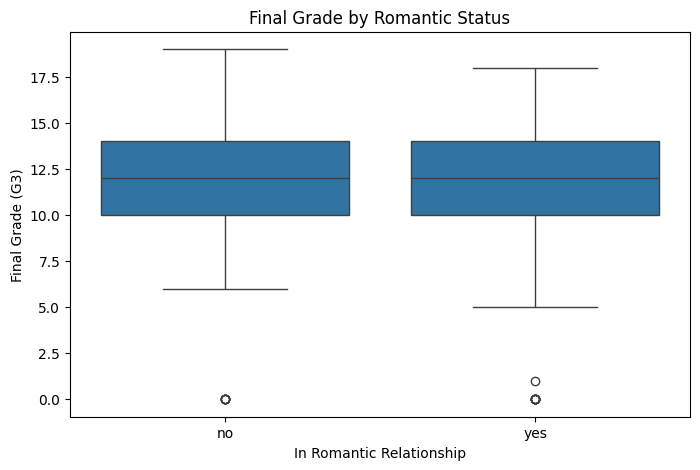

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(x='romantic', y='G3', data=df)
plt.xlabel('In Romantic Relationship')
plt.ylabel('Final Grade (G3)')
plt.title('Final Grade by Romantic Status')
plt.show()



How does being in a romantic relation affects academics?

Plot shows it doesen't affect much just a few outliers who perform bad than those not in relation.

LEVEL-4

In [172]:
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
x = df.drop('romantic', axis=1)
y = df['romantic']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)


In [92]:
if 'famsize' in df.columns and 'Pstatus' in df.columns:
    mask_missing = df['famsize'].isna()
    df.loc[mask_missing, 'famsize'] = np.where(
        df.loc[mask_missing, 'Pstatus'] == 'A',
        'LE3', 
        'GT3'
    )

In [136]:
categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet'
]
mode_cols = [
    'Medu', 'Fedu', 'traveltime',  'failures', 
    'famrel', 'freetime', 'goout', 'Dalc',  'health'
]
median_cols = x.select_dtypes(include=['int64', 'float64']) \
                          .columns.difference(mode_cols + categorical_cols) \
                          .tolist()
mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('scaler', StandardScaler())  
])
median_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [137]:
preprocessor = ColumnTransformer(transformers=[
    ('num_median', median_transformer, median_cols),
    ('num_mode', mode_transformer, mode_cols),
    ('cat', categorical_transformer, categorical_cols) 
])
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
    ])
}

In [138]:
results = []
for name, pipe in models.items():
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    y_proba = pipe.predict_proba(x_test)[:, 1]
    
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }
    results.append(metrics)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       123
           1       0.47      0.56      0.51        72

    accuracy                           0.61       195
   macro avg       0.59      0.59      0.59       195
weighted avg       0.62      0.61      0.61       195

Logistic Regression Confusion Matrix:
[[78 45]
 [32 40]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       123
           1       0.48      0.15      0.23        72

    accuracy                           0.63       195
   macro avg       0.56      0.53      0.49       195
weighted avg       0.58      0.63      0.56       195

Random Forest Confusion Matrix:
[[111  12]
 [ 61  11]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       123
           1   

In [151]:
results_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(results_df.sort_values(by='F1-Score', ascending=False))


Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.605128   0.470588  0.555556  0.509554  0.615967
2                  SVM  0.605128   0.470588  0.555556  0.509554  0.619580
1        Random Forest  0.625641   0.478261  0.152778  0.231579  0.565266


In [158]:
#Feature Selection 
feature_names = models['Random Forest'].named_steps['preprocessor'].get_feature_names_out()
print("Tree-based Feature Importance:")
for model_name in ['Random Forest']: 
    model = models[model_name].named_steps['classifier']
    importances = model.feature_importances_
    important_features = pd.Series(importances, index=feature_names)
    top_10 = important_features.sort_values(ascending=False).head(10)
    
    print(f"\n{model_name} Top Features:")
    print(top_10.to_string())
    print("\n" + "="*50)

Tree-based Feature Importance:

Random Forest Top Features:
num_median__G3           0.067423
num_median__G2           0.063807
num_median__G1           0.063382
num_median__absences     0.054636
num_median__Feature_1    0.053569
num_mode__goout          0.051045
num_mode__freetime       0.045400
num_mode__famrel         0.044452
num_mode__health         0.043180
num_mode__Fedu           0.038097



In [156]:
#Prediction
sample = x_test.iloc[[34]]  
for name, pipe in models.items():
    pred = pipe.predict(sample)
    proba = pipe.predict_proba(sample)[0][1]
    print(f"\n{name} Prediction:")
    print(f"Predicted: {'In Relationship' if pred[0] else 'Single'}")
    print(f"Probability: {proba:.2%}")


Logistic Regression Prediction:
Predicted: Single
Probability: 22.79%

Random Forest Prediction:
Predicted: Single
Probability: 21.00%

SVM Prediction:
Predicted: Single
Probability: 35.97%


LEVEL-5

<Figure size 800x600 with 0 Axes>

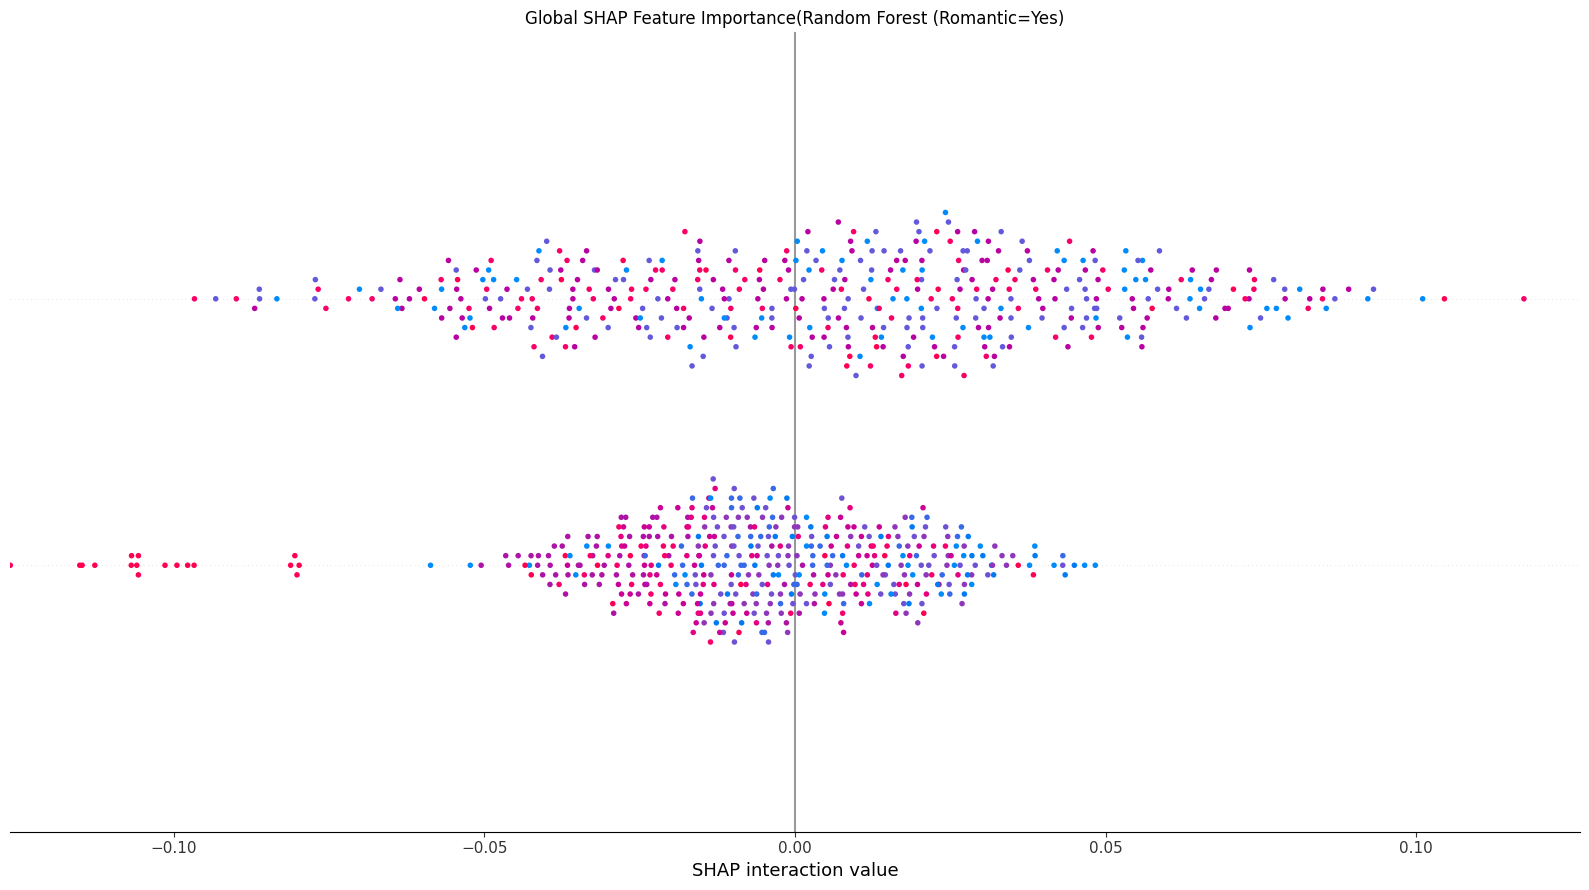

In [179]:
rf_pipe = models['Random Forest']
prep = rf_pipe.named_steps['preprocessor']
rf = rf_pipe.named_steps['classifier']

x_train_proc = prep.transform(x_train)
x_test_proc = prep.transform(x_test)


num_cols = median_cols + mode_cols
ohe = prep.named_transformers_['cat'].named_steps['onehot']
cat_ohe_cols = ohe.get_feature_names_out(categorical_cols)
feature_names = list(num_cols) + list(cat_ohe_cols)

explainer = shap.TreeExplainer(rf)
explanation = explainer(x_train_proc)  

if isinstance(explainer.expected_value, list) and len(explainer.expected_value) == 2:
    shap_values_class1 = explanation[:, 1]
else:
    shap_values_class1 = explanation

plt.figure(figsize=(8,6))
shap.summary_plot(
    shap_values_class1,
    plot_type='bar',
    max_display=10,
    show=False
)
plt.title("Global SHAP Feature Importance(Random Forest (Romantic=Yes)")
plt.tight_layout()
plt.show()


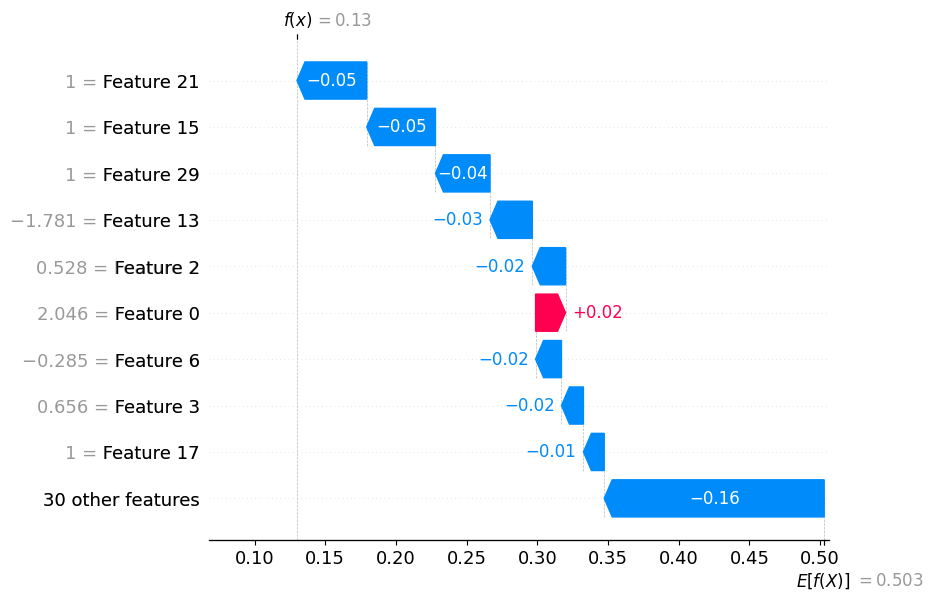

Local SHAP explanation for a student predicted NO:


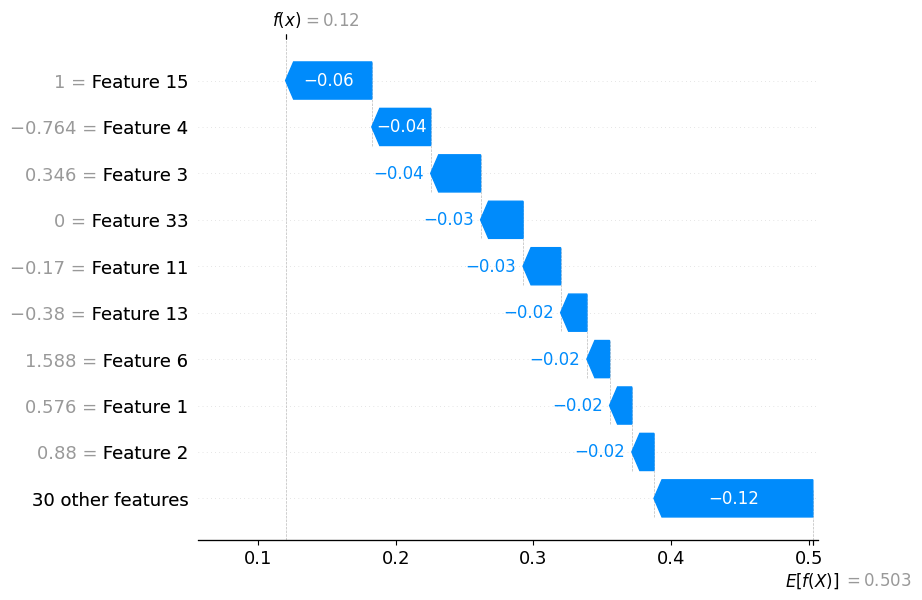

In [187]:
preds = rf_pipe.predict(x_test)
idx_yes = np.where(preds == 1)[0][0]
idx_no = np.where(preds == 0)[0][0]

explanation = explainer(x_train_proc)

if len(explanation.shape) == 3 and explanation.shape[-1] == 2:
    shap_values_class1 = explanation[:, :, 1]
else:
    shap_values_class1 = explanation


shap.plots.waterfall(
    shap_values_class1[idx_yes],  
    max_display=10
)

print("Local SHAP explanation for a student predicted NO:")
shap.plots.waterfall(
    shap_values_class1[idx_no],
    max_display=10
)

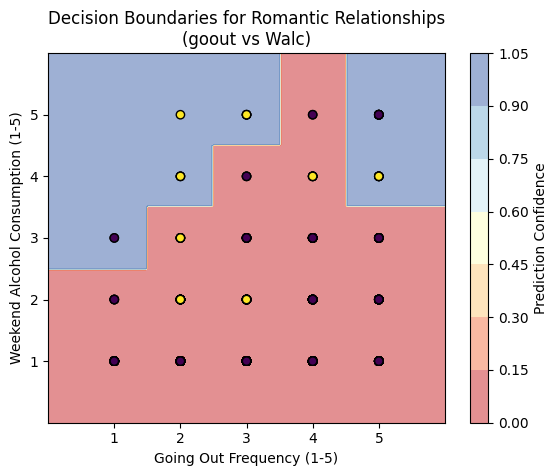

In [186]:
from sklearn.inspection import DecisionBoundaryDisplay

x = df[['goout', 'Dalc']]
y = df['romantic']

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x, y)

disp = DecisionBoundaryDisplay.from_estimator(
    rf,
    x,
    response_method="predict",
    alpha=0.5,
    grid_resolution=200,
    cmap=plt.cm.RdYlBu,
)
disp.ax_.scatter(
    x.iloc[:, 0], x.iloc[:, 1],
    c=y, edgecolor="black", lw=1
)
plt.xlabel("Going Out Frequency (1-5)")
plt.ylabel("Weekend Alcohol Consumption (1-5)")
plt.title("Decision Boundaries for Romantic Relationships\n(goout vs Walc)")
plt.xticks(np.arange(1, 6))
plt.yticks(np.arange(1, 6))
plt.colorbar(disp.surface_, label="Prediction Confidence")
plt.show()